<a href="https://colab.research.google.com/github/barbarabraune/graficos_speckle/blob/main/etapa2_desv_db_lac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# cd /content/drive/MyDrive/graficos_speckle/


/content/drive/MyDrive/graficos_speckle


In [4]:
df = pd.read_excel(r'./100_certo.xlsx', usecols="G,H,CE")


In [5]:
print(df.head(3))

  7. STANDARD DEVIATION (σ) for D for Dʙ 8. ★D (D with highest r²) for Dʙ  \
0                                 0,0007                           2,8781   
1                                 0,0006                           2,8775   
2                                 0,0012                           2,8747   

  83. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎/Ǥɴ ∀ ɢ∈Ǥ  
0                                        0,0159  
1                                        0,0162  
2                                        0,0153  


In [6]:
frames = []
for i in range(2517):
    frames.append(i)

In [7]:
db = list(df['8. ★D (D with highest r²) for Dʙ'])
sigma = list(df['7. STANDARD DEVIATION (σ) for D for Dʙ'])
lac = list(df['83. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎/Ǥɴ ∀ ɢ∈Ǥ'])

Substituindo "," por "."

In [8]:
dbFloat = []

for dado in db:
    dbFloat.append(float(dado.replace(',', '.')))

sigmaFloat = []

for dado in sigma:
    sigmaFloat.append(float(dado.replace(',', '.')))

lacFloat = []

for dado in lac:
    lacFloat.append(float(dado.replace(',', '.')))

In [1]:
# print(dbFloat)
# print(sigmaFloat)
# print(lacFloat)

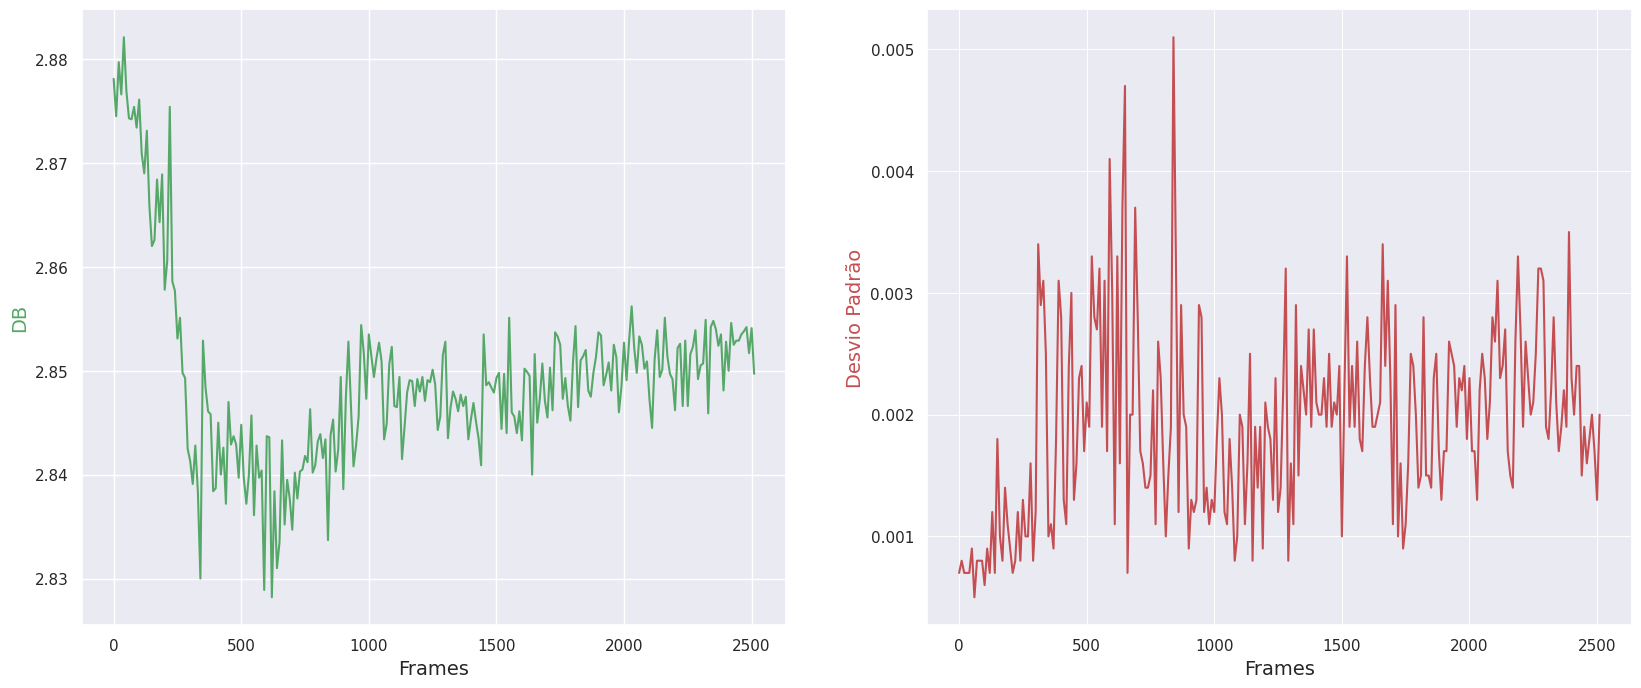

In [164]:
# fig = plt.figure()
fig, ax= plt.subplots(1, 2, figsize=(20,8))

# ax2 = ax1.twinx()
ax[0].plot(frames[0::10], dbFloat[0::10], 'g-')
ax[1].plot(frames[0::10], sigmaFloat[0::10], 'r-')

# ax[0].set_ylim(2.75, 2.9)
# ax[1].set_ylim(0.0002, 0.02)
ax[0].set_ylabel('DB', color='g', fontsize=14)
ax[0].set_xlabel('Frames', fontsize=14)
ax[1].set_xlabel('Frames', fontsize=14)
ax[1].set_ylabel('Desvio Padrão', color='r', fontsize=14)
plt.grid(linestyle='-', linewidth=0.7)
plt.show()

# save the plot as a figure
fig.savefig('db_desv.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

100


Text(0.5, 0, 'Intervalo')

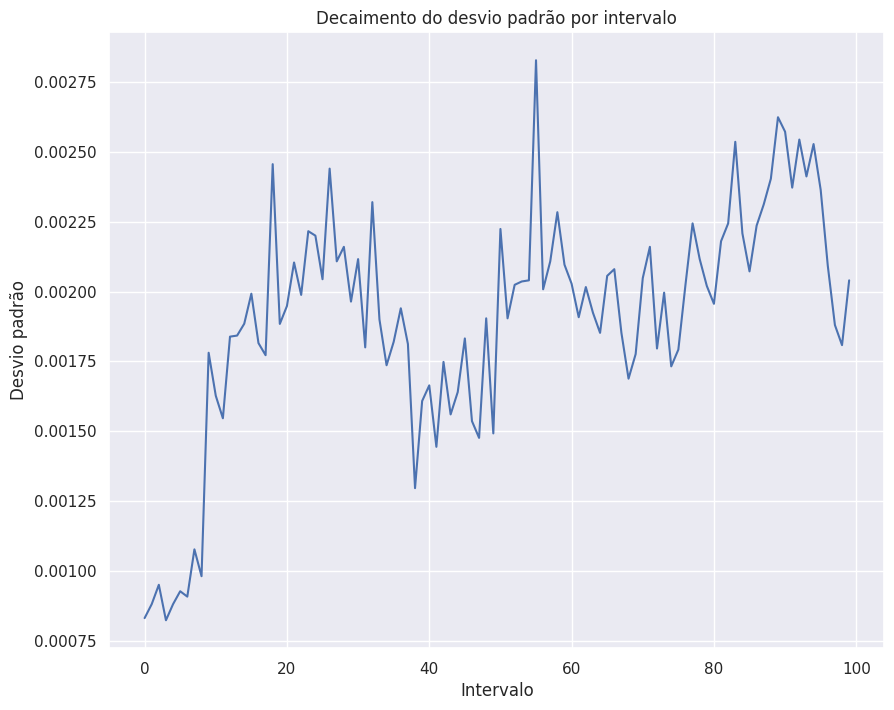

In [148]:
#divisão de frames por intervalos do valor 0 ao 2517 

listaDesvioPadrao = []

dp1 = np.std(sigmaFloat[0:500]) 
dp2 = np.std(sigmaFloat[501:1000])
dp3 = np.std(sigmaFloat[1001:1500])
dp4 = np.std(sigmaFloat[1501:2000])
dp5 = np.std(sigmaFloat[2001:2517])

listaSplit = np.array_split(sigmaFloat, 100)
# print(listaSplit)

for lista in listaSplit:
    listaDesvioPadrao.append(np.mean(lista))

print(len(listaDesvioPadrao))

#há uma forma mais fácil de fazer isso acima?
#2517 é divisível por 3, teria como fazer 839 intervalos p/ uma curva mais suave?

lista1 = [dp1, dp2, dp3, dp4, dp5]
# print(lista1)
#lista2 = ['500', '1000', '1500', '2000', '2517'] tentativa de plotar por frames

fig = plt.figure(figsize=(10,8))
ax1=fig.add_subplot()

ax1.plot(listaDesvioPadrao)

plt.title('Decaimento do desvio padrão por intervalo')
plt.ylabel('Desvio padrão')
plt.xlabel('Intervalo') #como plotar por frames de acordo com o intervalo?

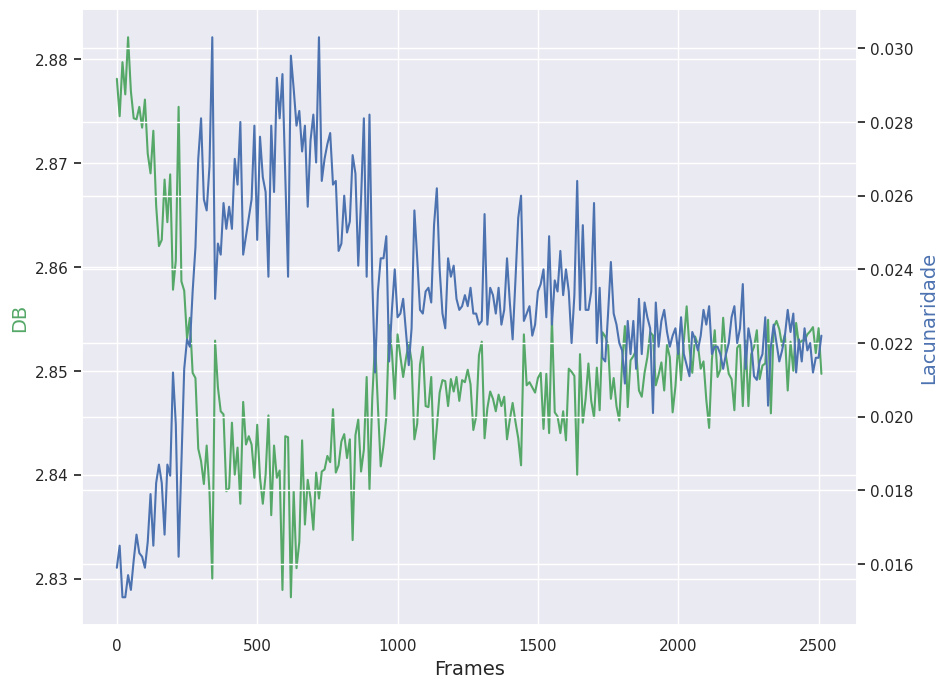

In [166]:
fig = plt.figure(figsize=(10,8))
ax1=fig.add_subplot()

ax2 = ax1.twinx()
ax1.plot(frames[0::10], dbFloat[0::10], 'g-')
ax2.plot(frames[0::10], lacFloat[0::10], 'b-')

ax1.set_xlabel('Frames', fontsize=14)
ax1.set_ylabel('DB', color='g', fontsize=14)
ax2.set_ylabel('Lacunaridade', color='b', fontsize=14)
plt.grid(linestyle='-', linewidth=0.7)
plt.show()

# save the plot as a file
fig.savefig('db_lac.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

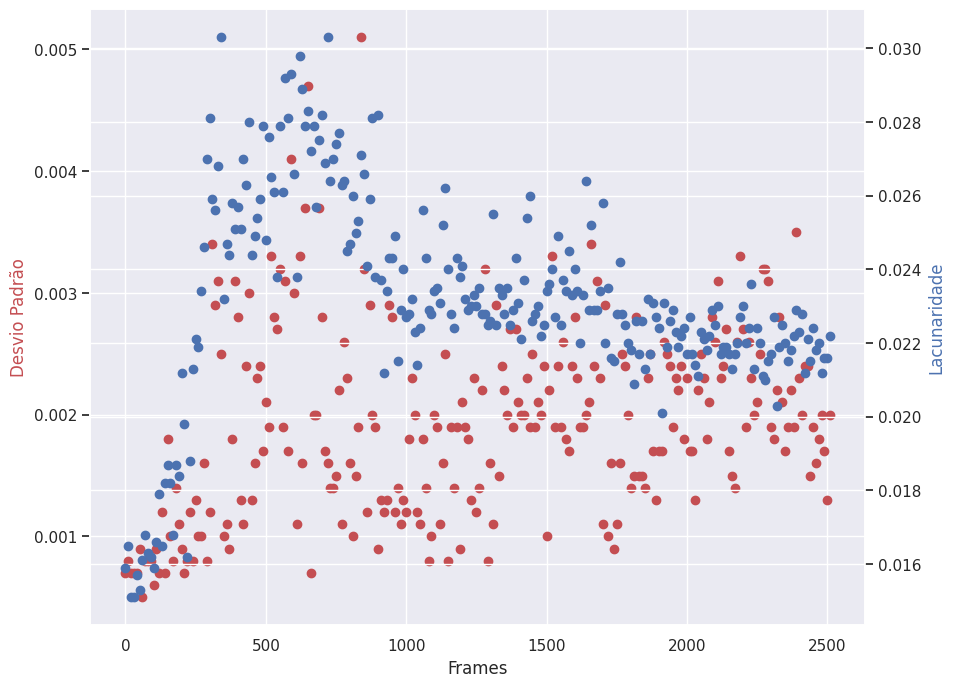

In [142]:
#ESQUECE ESSE AQUI
fig = plt.figure(figsize=(10,8))
ax1=fig.add_subplot()

ax2 = ax1.twinx()

ax1.scatter(x=frames[0::10], y=sigmaFloat[0::10], c='r')
ax2.scatter(x=frames[0::10], y=lacFloat[0::10], c='b')

ax1.set_xlabel('Frames')
ax1.set_ylabel('Desvio Padrão', color='r')
ax2.set_ylabel('Lacunaridade', color='b')

plt.show()

fig.savefig('scatter.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

Histogramas dos dados obtidos:

In [138]:
import numpy as np

def Average(lst):
    return sum(lst) / len(lst)

def histogram(type_hist, data, varname, tituloPlot, legendLocation, numberBins):
    
    media = Average(data)
    desvioPadrao = np.std(data)
    
    mu = media
    sigma = desvioPadrao
    
    # figname = 'hist_%s.png' %place

    fig, axes = plt.subplots(figsize=(10,8))
    
    n_bins = numberBins

    params = { 'ax': axes } 
        
    axes.set_xlabel(varname)
    axes.set_ylabel('Quantidade')

    axes.set_title(tituloPlot)

    plt.grid(axis='y', linestyle='-', linewidth=0.5)
    axes = sns.histplot(data, bins=n_bins, kde=True)
    
    # y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

    # axes.plot(bins, y, ls='--', color='#ff7f0e', label='Melhor fit da distribuição')
    
    axes.axvline(media, color='r', label='Média geral dos dados')
    axes.legend(loc=legendLocation)
    
    # plt.show()

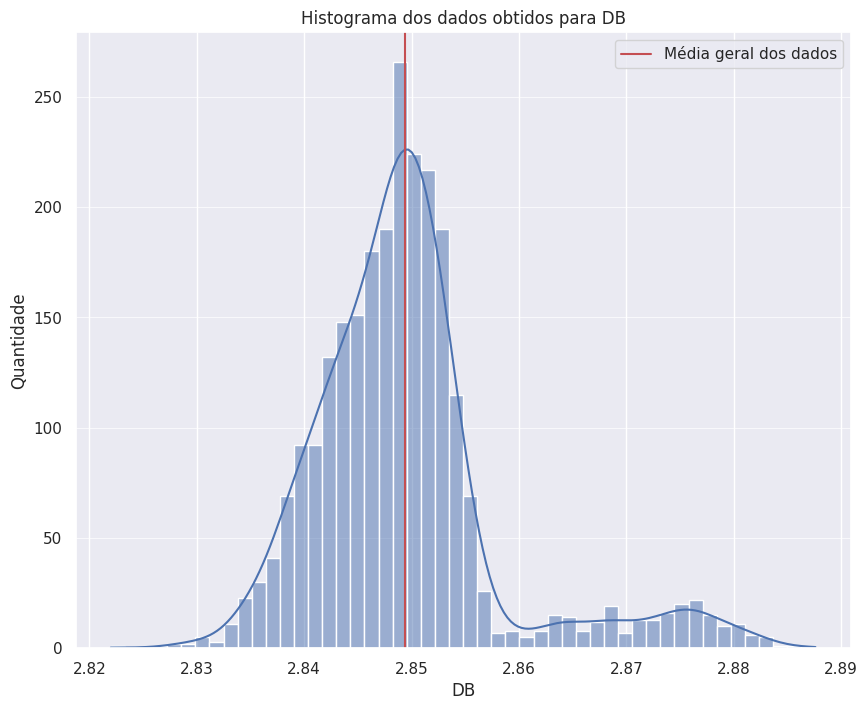

In [139]:
histogram('fixed_bins_size', dbFloat, 'DB', 'Histograma dos dados obtidos para DB', 'upper right', 50)

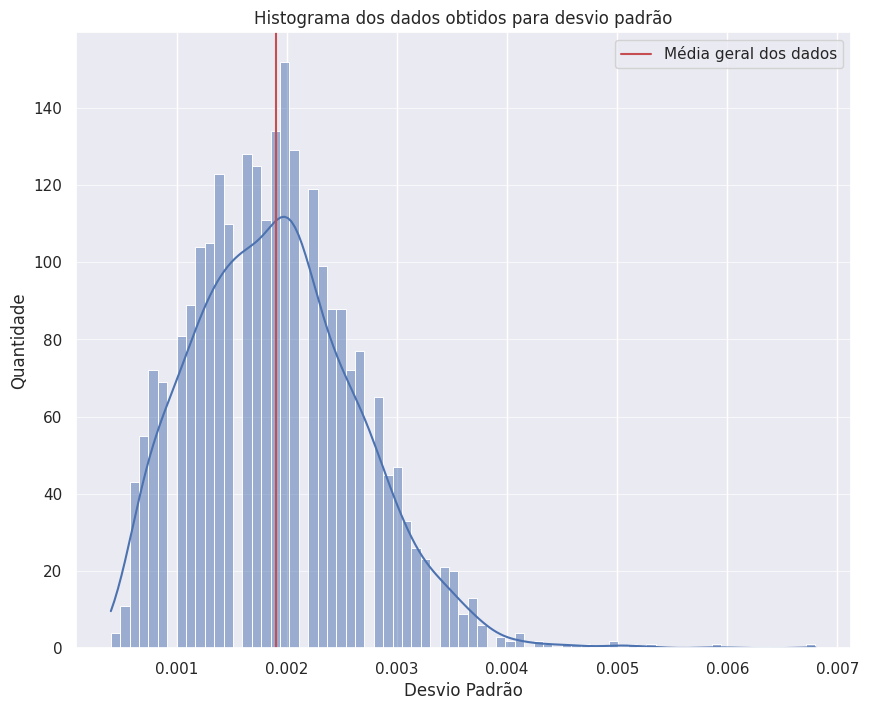

In [140]:
histogram('fixed_bins_size', sigmaFloat, 'Desvio Padrão', 'Histograma dos dados obtidos para desvio padrão', 'upper right', 75)

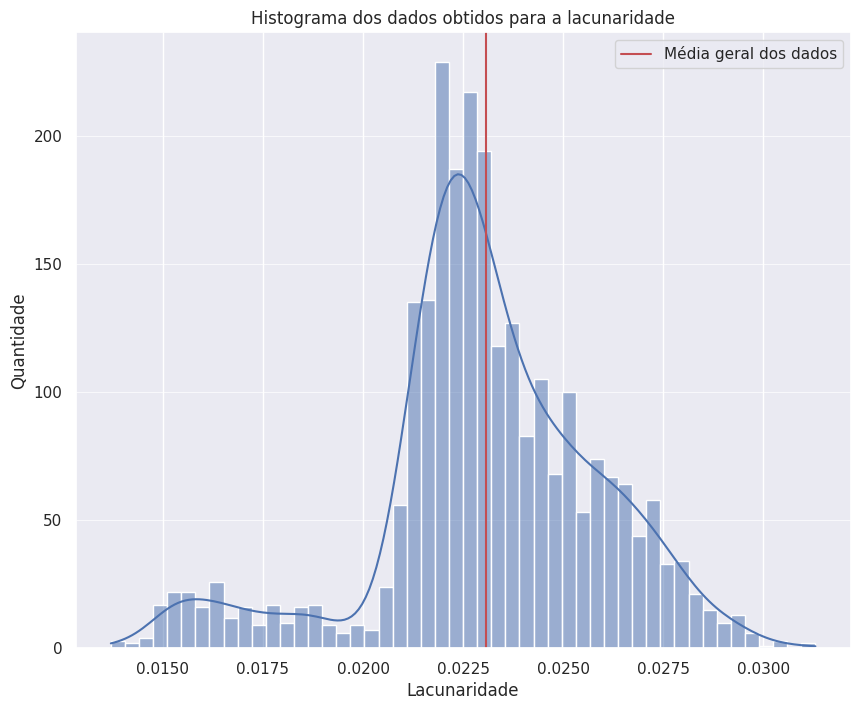

In [141]:
histogram('fixed_bins_size', lacFloat, 'Lacunaridade', 'Histograma dos dados obtidos para a lacunaridade', 'upper right', 50)